In [256]:

##################### Python 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime
import dcor
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
import os
os.chdir('/Users/sss/Desktop/Data')
os.getcwd()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 60% !important; }</style>"))


In [257]:
# 기본 폰트 설정으로 변경
plt.rc('font', family='Arial')
sns.set(font='Arial')


In [258]:
df = pd.read_csv('chapter13_congestion copy.csv', encoding='cp949')


In [259]:
df.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


In [260]:
df.shape

(1205, 12)

In [261]:
df['일자'] = pd.to_datetime(df['일자'])

In [262]:
df['year'] = df['일자'].dt.year
df['month'] = df['일자'].dt.month
df['day'] = df['일자'].dt.day

In [263]:
df.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,year,month,day
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,2,2


In [264]:
df['일자'].max(), df['일자'].min()

(Timestamp('2021-01-26 00:00:00'), Timestamp('2016-02-01 00:00:00'))

In [265]:
df_2016 = df[df['year'] == 2016]
df_2016 = df[df['year'] == 2016]
df_2016 = df[df['year'] == 2016]
df_2016 = df[df['year'] == 2016]
df_2016 = df[df['year'] == 2016]


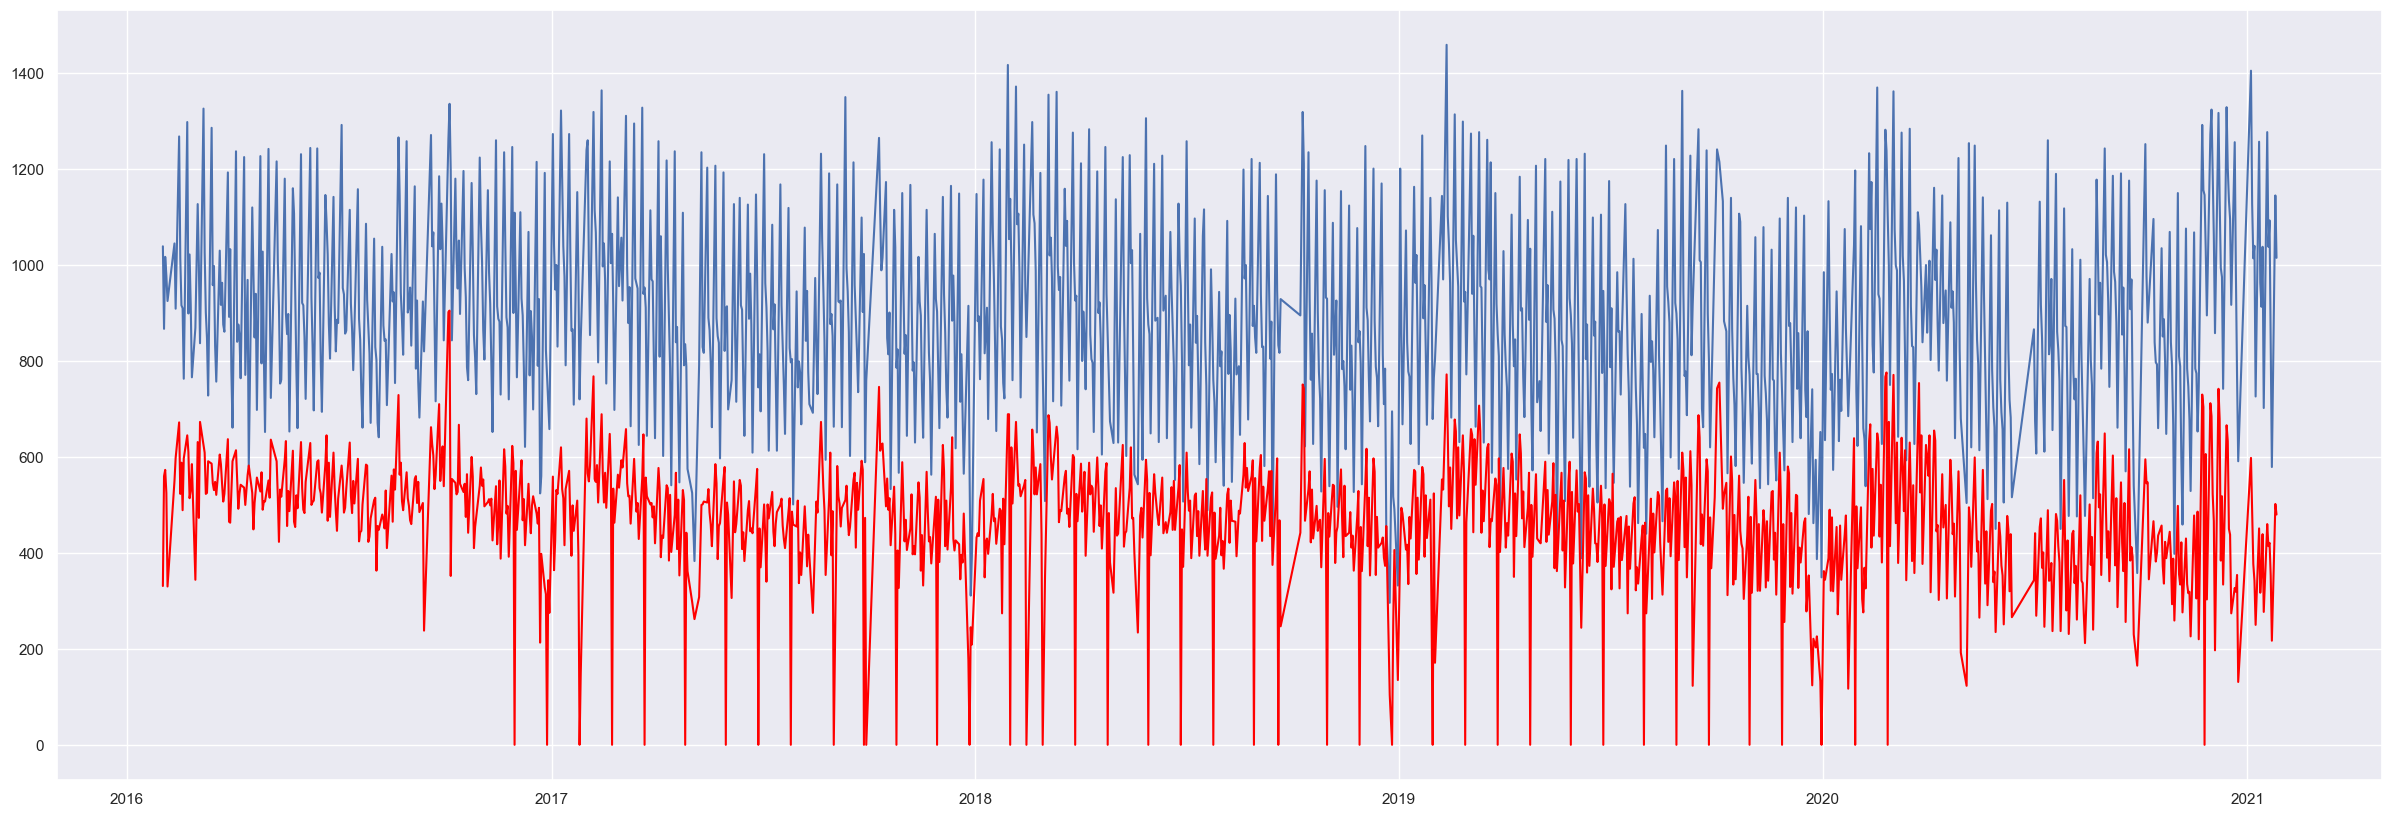

In [266]:
plt.plot(df['일자'], df['중식계'])
plt.gcf().set_size_inches(30,10)
plt.plot(df['일자'], df['석식계'], color='red')
plt.gcf().set_size_inches(30,10)
plt.show()

In [267]:
df.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', 'year', 'month',
       'day'],
      dtype='object')

In [268]:
df_categorical = df[['조식메뉴', '중식메뉴', '석식메뉴']]
df_categorical

,조식메뉴,중식메뉴,석식메뉴
0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ..."
1,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무..."
2,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기..."
3,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포..."
4,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:..."
...,...,...,...
1200,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치
1201,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치
1202,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치
1203,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치


In [269]:
df_numerical = df[['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본a사소속재택근무자수', '중식계', '석식계', 'year', 'month',
       'day']]a
df_numerical

SyntaxError: invalid syntax (2551703662.py, line 3)

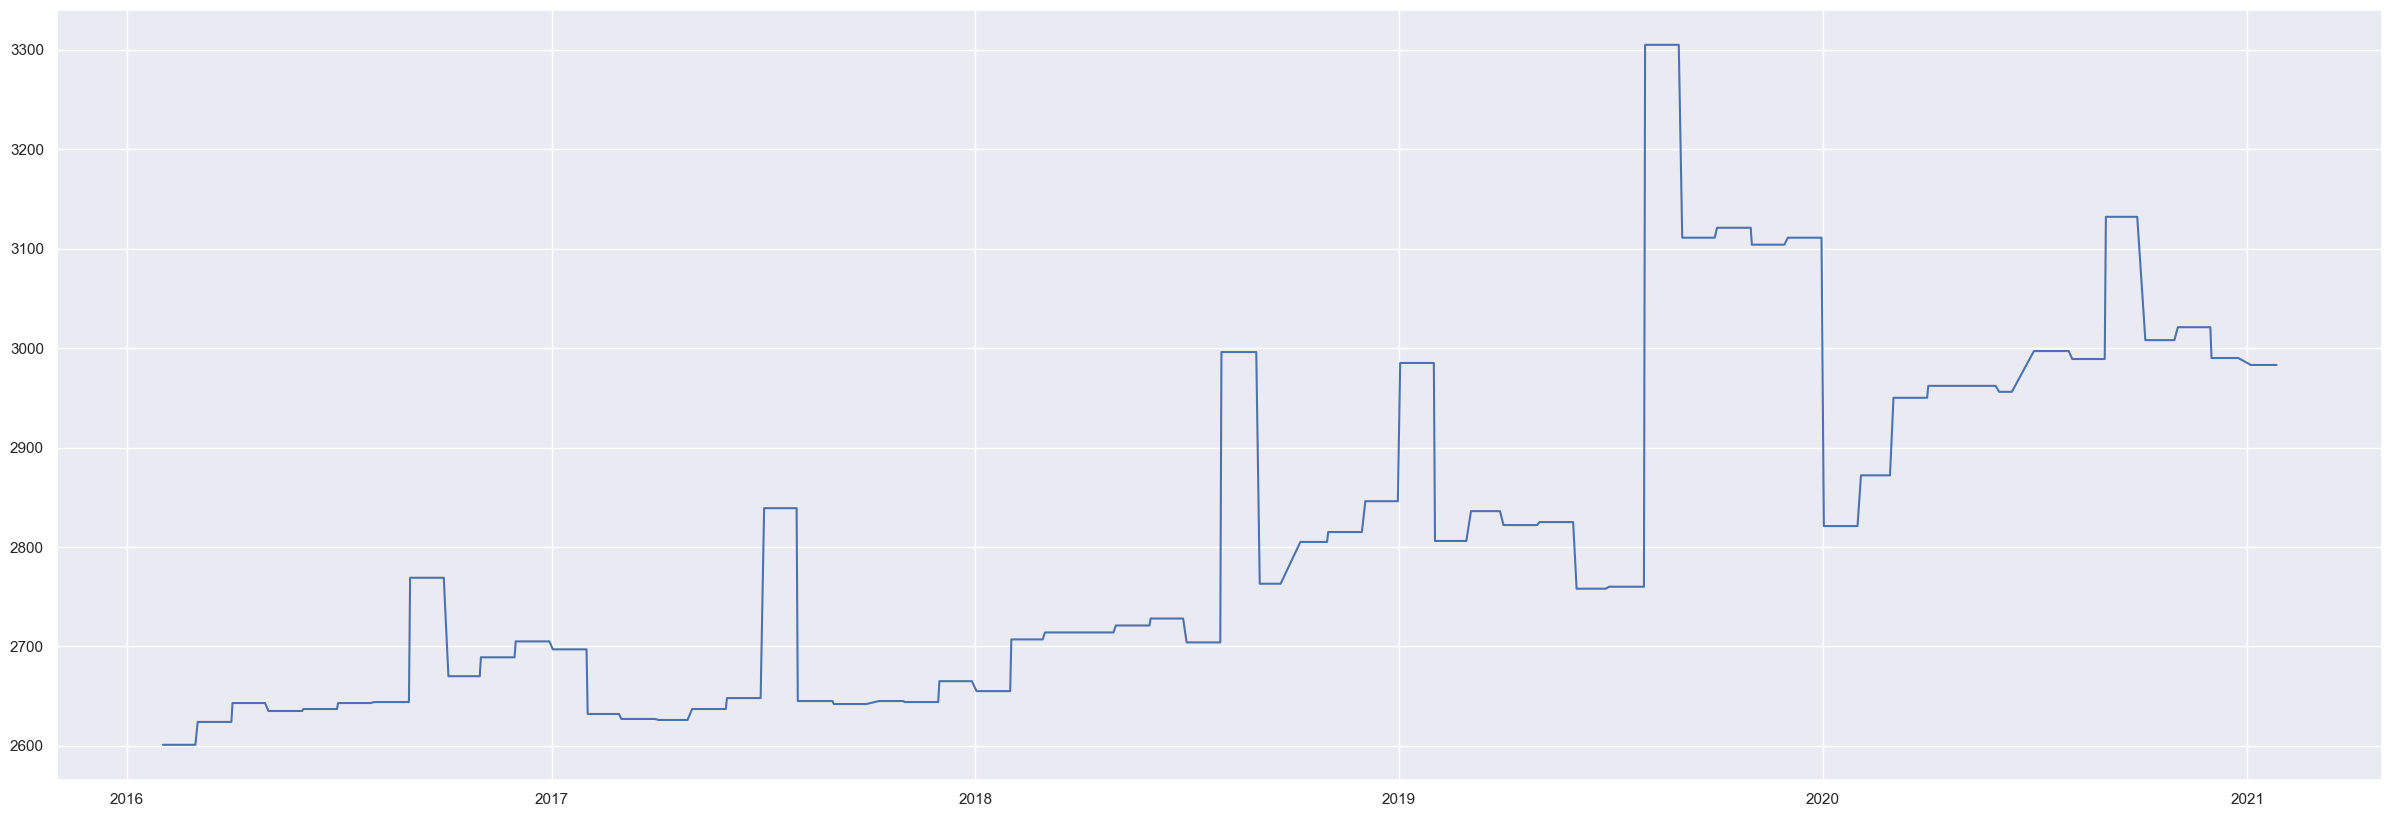

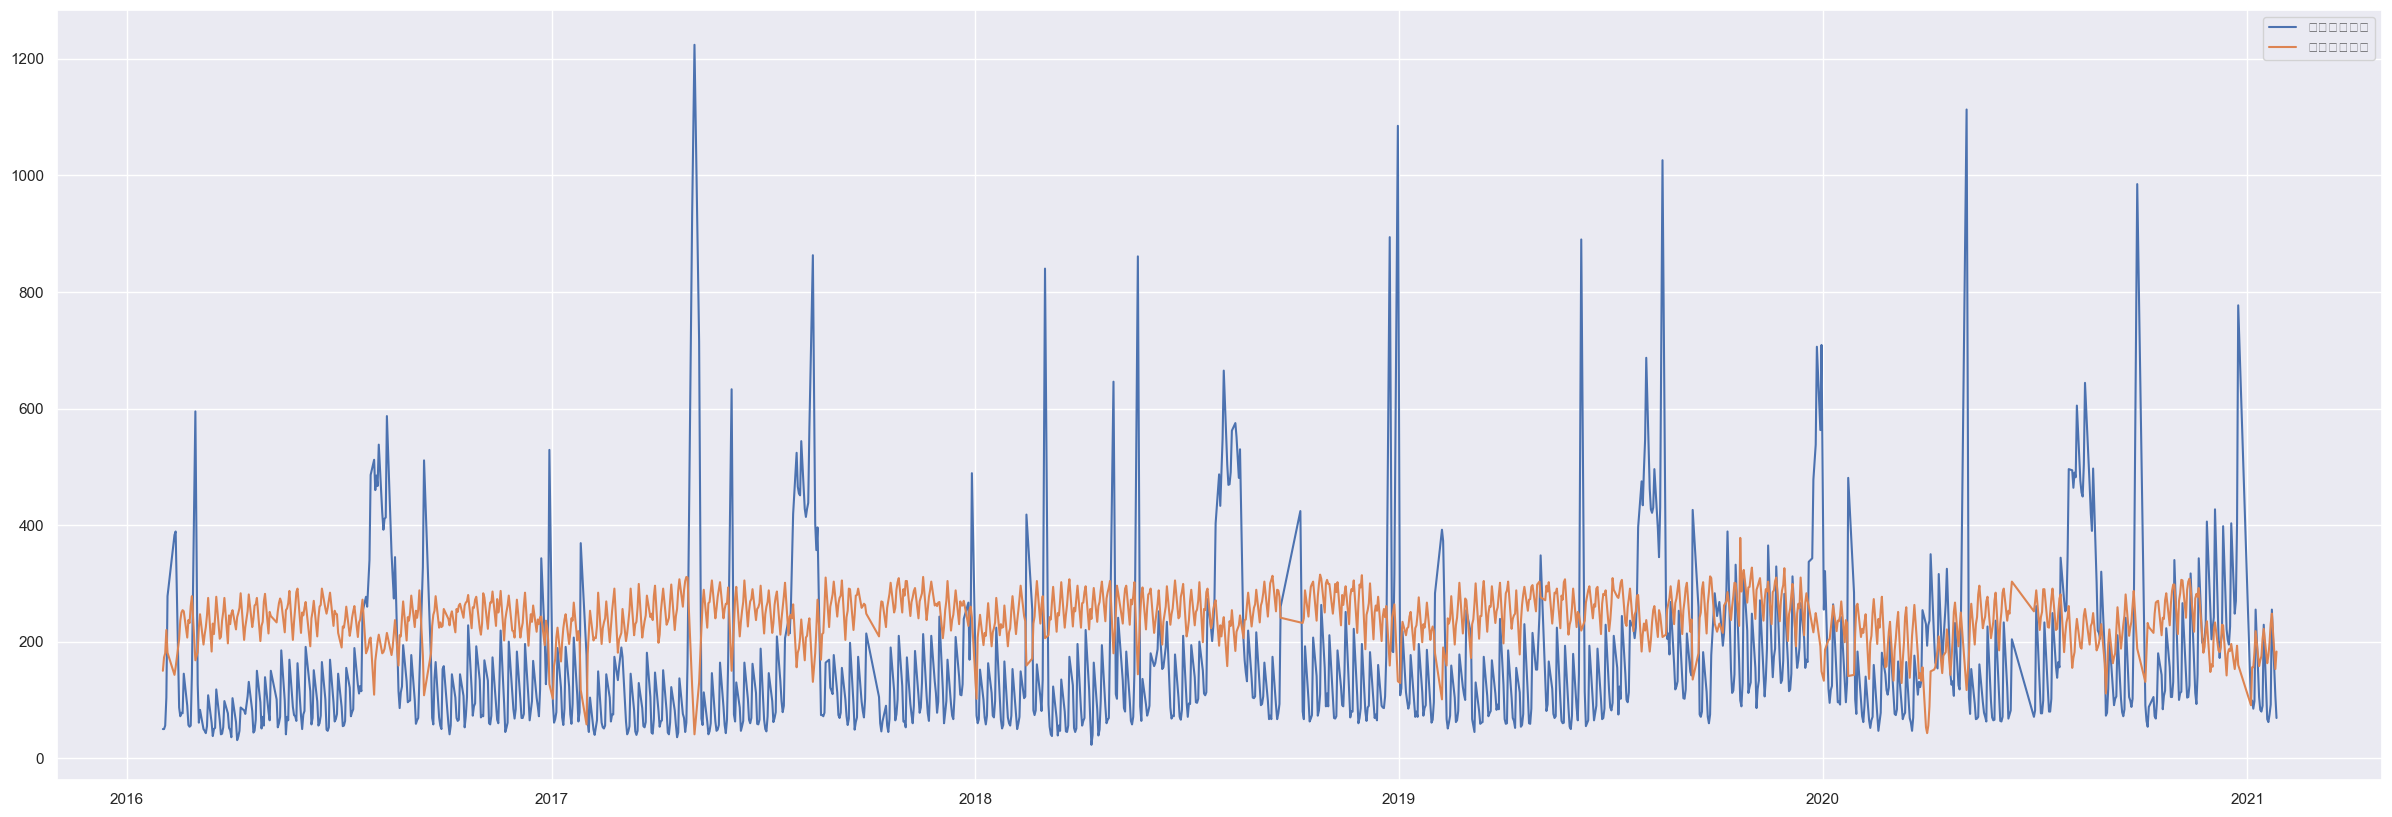

In [270]:
plt.plot(df['일자'], df['본사정원수'])
plt.gcf().set_size_inches(30,10)
plt.show()

plt.plot(df['일자'], df['본사휴가자수'], label='본사휴가자수')
plt.plot(df['일자'], df['본사출장자수'], label='본사출장자수')
plt.legend(fontsize=10)
plt.gcf().set_size_inches(30,10)
plt.show()



In [271]:
df.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,year,month,day
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,2,2


In [272]:
df_2016 = df[df['year'] == 2016]
df_check = df_2016.groupby('month')['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수'].mean()
df_check

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
month,,,,,
2,2601.0,153.611111,210.111111,247.611111,0.0
3,2624.0,63.863636,229.363636,221.500000,0.0
4,2643.0,78.150000,247.300000,207.500000,0.0
5,2635.0,89.700000,250.900000,209.200000,0.0
6,2637.0,91.095238,251.523810,199.285714,0.0
7,2643.0,166.523810,224.476190,189.428571,0.0
8,2644.0,314.772727,201.227273,196.636364,0.0
9,2769.0,138.315789,232.842105,269.578947,0.0
10,2670.0,100.700000,252.250000,276.900000,0.0


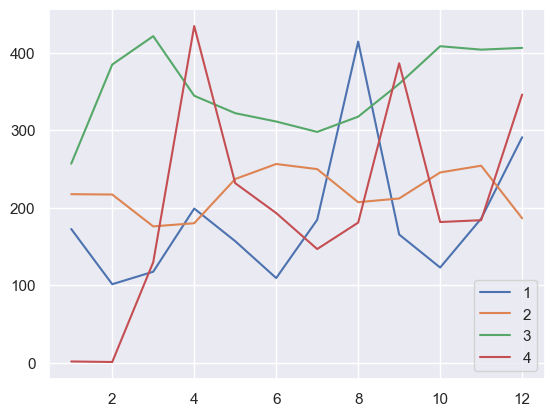

In [273]:
df_2016 = df[df['year'] == 2020]
df_check = df_2016.groupby('month')['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수'].mean()
df_check
plt.plot(df_check.index, df_check['본사휴가자수'], label = 1)
plt.plot(df_check.index, df_check['본사출장자수'], label=2)
plt.plot(df_check.index, df_check['본사시간외근무명령서승인건수'], label=3)
plt.plot(df_check.index, df_check['현본사소속재택근무자수'], label=4)
plt.legend()
plt.show()

In [274]:
 df.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,year,month,day
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,2,2
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016,2,3


In [275]:
df_2016 = df[df['year'] == 2016]
df_check = df_2016.groupby('month')['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', \
                                    '중식계', '석식계'].mean()
df_check

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
month,,,,,,,
2,2601.0,153.611111,210.111111,247.611111,0.0,967.888889,531.388889
3,2624.0,63.863636,229.363636,221.500000,0.0,962.227273,556.181818
4,2643.0,78.150000,247.300000,207.500000,0.0,893.750000,533.250000
5,2635.0,89.700000,250.900000,209.200000,0.0,943.400000,534.700000
6,2637.0,91.095238,251.523810,199.285714,0.0,932.761905,534.666667
7,2643.0,166.523810,224.476190,189.428571,0.0,904.095238,511.809524
8,2644.0,314.772727,201.227273,196.636364,0.0,912.409091,510.090909
9,2769.0,138.315789,232.842105,269.578947,0.0,950.578947,543.157895
10,2670.0,100.700000,252.250000,276.900000,0.0,1010.800000,555.450000


([<matplotlib.axis.XTick at 0x165012250>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

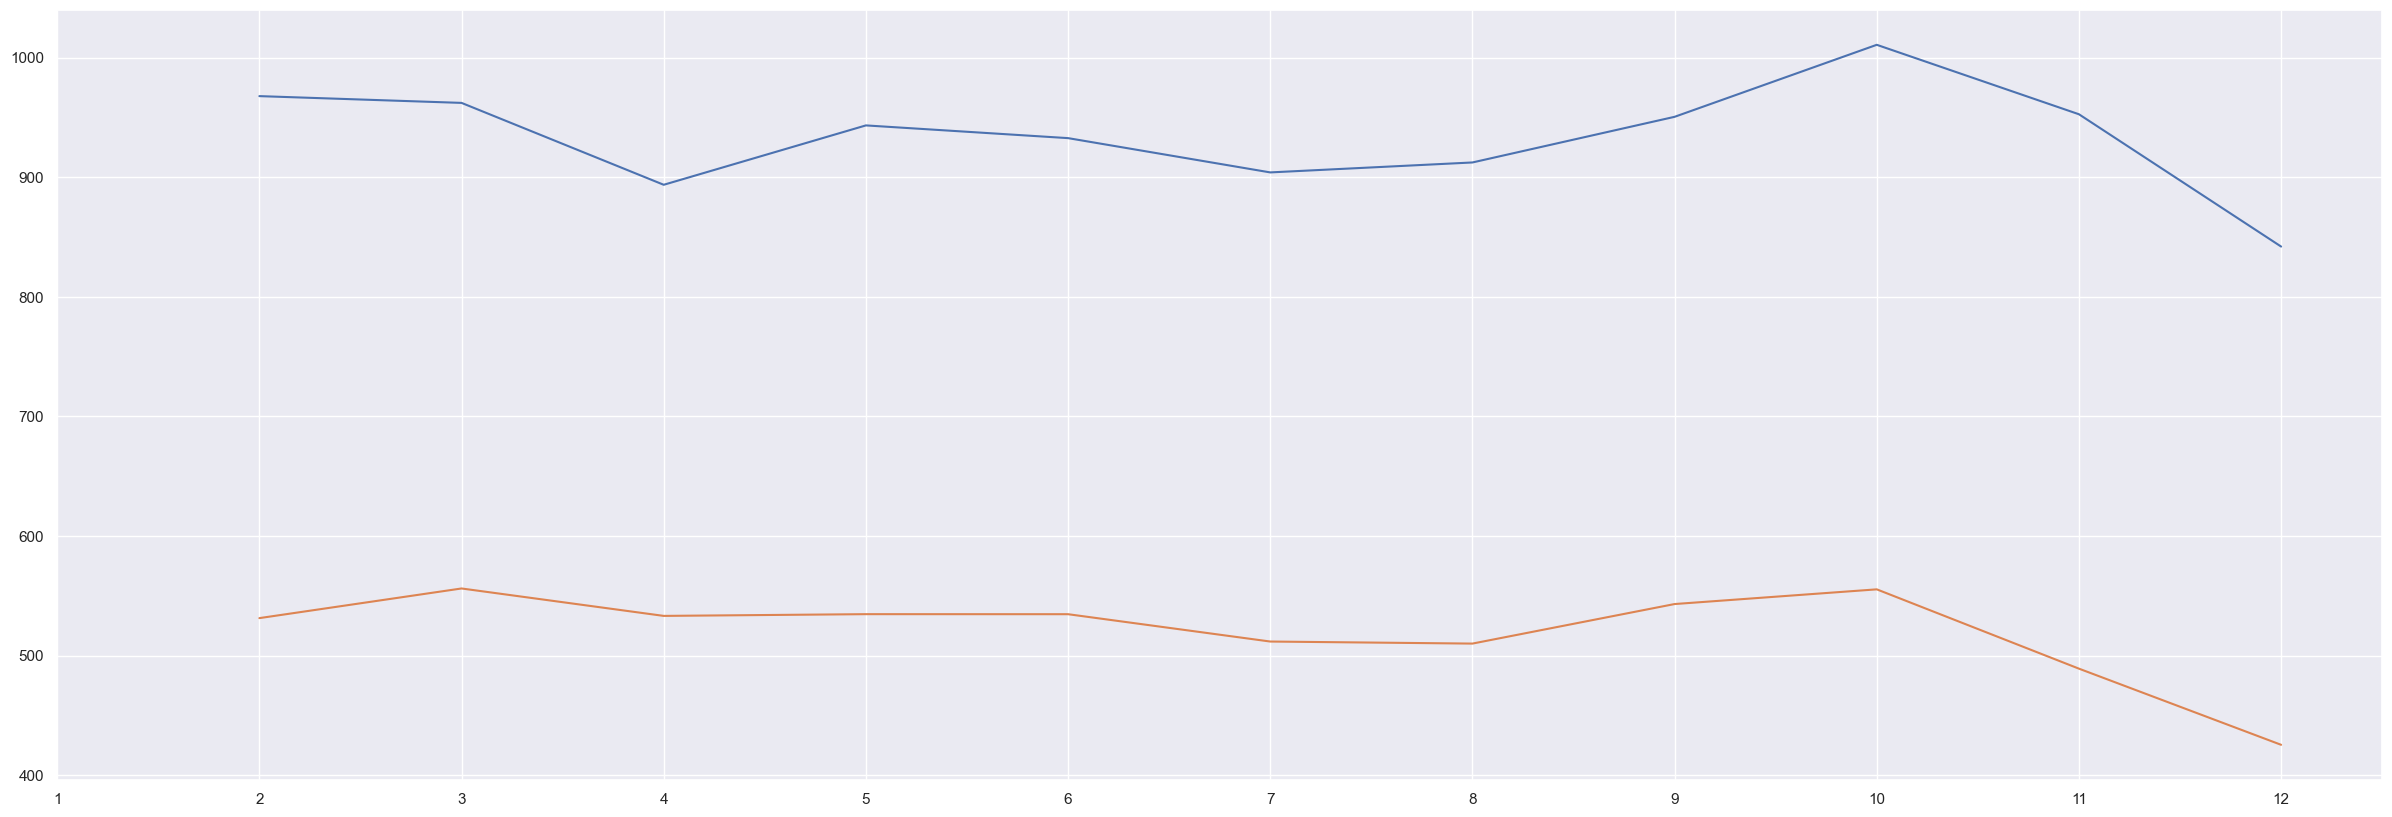

In [276]:
df_2016 = df[df['year'] == 2016]
df_check = df_2016.groupby('month')['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', \
                                    '중식계', '석식계'].mean()
df_check
plt.plot(df_check.index, df_check['중식계'])
plt.plot(df_check.index, df_check['석식계'])

plt.gcf().set_size_inches(30,10)
plt.xticks(range(1,13))

In [277]:
df_2016 = df[df['year'] == 2021]
df_check = df_2016.groupby('month')['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', \
                                    '중식계', '석식계'].mean()
df_check
# plt.plot(df_check.index, df_check['중식계'])
# plt.plot(df_check.index, df_check['석식계'])

# plt.gcf().set_size_inches(30,10)
# plt.xticks(range(1,13))

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
month,,,,,,,
1,2983.0,114.294118,181.352941,320.647059,370.294118,1009.705882,396.588235


In [278]:
df_2016 = df[df['year'] == 2021]
df_check = df_2016.groupby('요일')['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', \
                                    '중식계', '석식계'].mean()
df_check

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
요일,,,,,,,
금,2983.0,246.333333,229.333333,0.333333,338.333333,669.000000,248.00
목,2983.0,93.333333,206.000000,434.333333,380.666667,970.000000,378.00
수,2983.0,80.000000,176.333333,7.666667,405.666667,1006.666667,386.00
월,2983.0,92.750000,141.250000,533.000000,348.250000,1271.000000,502.75
화,2983.0,78.250000,170.750000,498.000000,382.000000,1036.000000,423.75


In [279]:
new_order = ['월', '화', '수', '목', '금']  # 원하는 요일 순서로 재배열
df_check = df_check.reindex(new_order)
df_check

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
요일,,,,,,,
월,2983.0,92.750000,141.250000,533.000000,348.250000,1271.000000,502.75
화,2983.0,78.250000,170.750000,498.000000,382.000000,1036.000000,423.75
수,2983.0,80.000000,176.333333,7.666667,405.666667,1006.666667,386.00
목,2983.0,93.333333,206.000000,434.333333,380.666667,970.000000,378.00
금,2983.0,246.333333,229.333333,0.333333,338.333333,669.000000,248.00


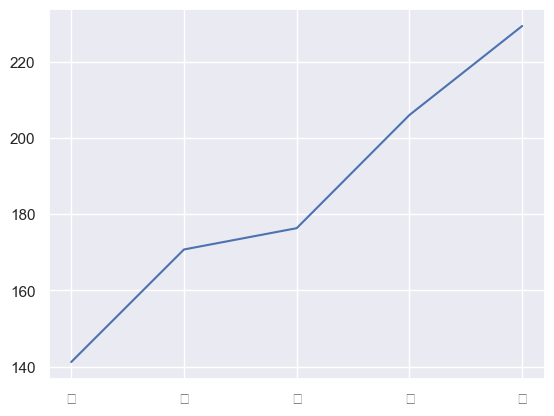

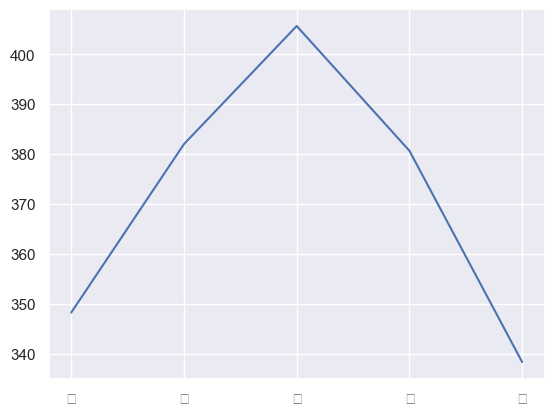

In [280]:
plt.plot(df_check.index, df_check['본사출장자수'])
plt.show()
plt.plot(df_check.index, df_check['현본사소속재택근무자수'])
plt.show()

<Axes: >

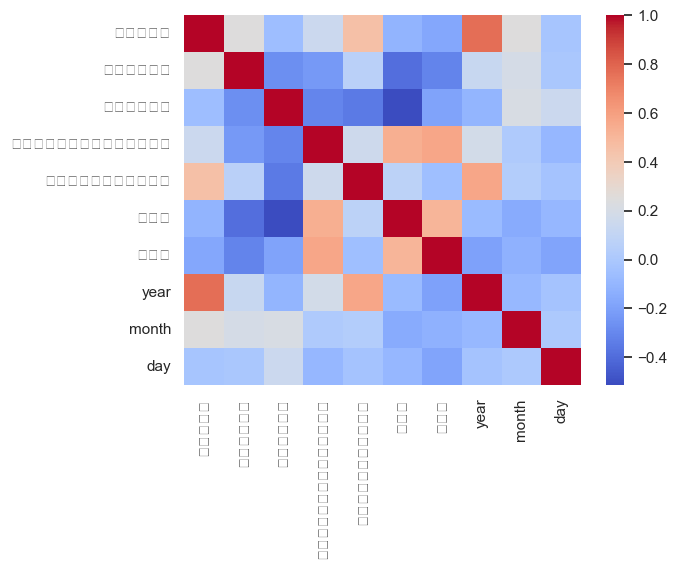

In [281]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [282]:
df.corr()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,year,month,day
본사정원수,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,-0.173852,0.764078,0.244705,-0.020737
본사휴가자수,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,-0.316894,0.129875,0.193627,-0.009210
본사출장자수,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,-0.188164,-0.109583,0.210877,0.144007
본사시간외근무명령서승인건수,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,0.571168,0.181749,0.018316,-0.093606
현본사소속재택근무자수,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057534,0.571133,0.033586,-0.031583
중식계,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287,-0.078804,-0.154664,-0.097392
석식계,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000,-0.194792,-0.127142,-0.185565
year,0.764078,0.129875,-0.109583,0.181749,0.571133,-0.078804,-0.194792,1.000000,-0.092612,-0.029843
month,0.244705,0.193627,0.210877,0.018316,0.033586,-0.154664,-0.127142,-0.092612,1.000000,0.002120
day,-0.020737,-0.009210,0.144007,-0.093606,-0.031583,-0.097392,-0.185565,-0.029843,0.002120,1.000000


In [283]:
df['조식main'] = df_categorical['조식메뉴'].astype(str).str.split('/').str[0] + \
df_categorical['조식메뉴'].astype(str).str.split('/').str[1].str.split('  ').str[0]
# df = df.drop('조식mian', axis=1)
# df

In [284]:
df['중식main'] = df_categorical['중식메뉴'].astype(str).str.split('/').str[0] + \
df_categorical['중식메뉴'].astype(str).str.split('/').str[1].str.split('  ').str[0]
df['중식main'].value_counts()

쌀밥흑미밥                                                 74
쌀밥잡곡밥 (쌀:국내산) 콩나물국                                    41
쌀밥잡곡밥 (쌀:국내산) 된장찌개                                    33
쌀밥잡곡밥 (쌀:국내산) 어묵국                                     26
쌀밥잡곡밥 (쌀:국내산) 배추된장국                                   24
                                                      ..
김치제육덮밥  미소장국  양장피잡채  계란찜  아삭고추무침귤                      1
쌀밥오곡밥 (쌀:국내산) 차돌박이된장찌개                                 1
쌀밥잡곡밥 (쌀:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭:국내산) 새송이버섯조림     1
쌀밥잡곡밥 (쌀:국내산) 얼큰소고기국                                   1
쌀밥팥밥                                                   1
Name: 중식main, Length: 332, dtype: int64

In [285]:
df['석식main'] = df_categorical['석식메뉴'].astype(str).str.split('/').str[0] + \
df_categorical['석식메뉴'].astype(str).str.split('/').str[1].str.split('  ').str[0]
df['석식main'].value_counts()

쌀밥잡곡밥                                         30
쌀밥잡곡밥 (쌀:국내산) 된장찌개                            20
쌀밥잡곡밥 (쌀:국내산) 콩비지찌개                           18
쌀밥잡곡밥 (쌀:국내산) 육개장                             17
쌀밥잡곡밥 (쌀:국내산) 콩나물국                            16
                                              ..
목살필라프 (쌀:국내산) 로제파스타스프                          1
닭갈비볶음밥 (쌀:국내산) 쌀국수  수제고로케  왕만두  오복지귤           1
쌀밥잡곡밥 (쌀:국내산) 토란탕                              1
쌀밥잡곡밥 (쌀,현미흑미:국내산) 수제비국                        1
흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치겉절이김치      1
Name: 석식main, Length: 376, dtype: int64

In [288]:
df.columns 

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', 'year', 'month',
       'day', '조식main', '중식main', '석식main'],
      dtype='object')

In [303]:
df.isna().sum()

일자                  0
요일                  0
본사정원수               0
본사휴가자수              0
본사출장자수              0
본사시간외근무명령서승인건수      0
현본사소속재택근무자수         0
조식메뉴                0
중식메뉴                0
석식메뉴                0
중식계                 0
석식계                 0
year                0
month               0
day                 0
조식main              0
중식main            175
석식main            411
dtype: int64

In [329]:
df_nan = df[df.isnull().any(axis=1)]
df_nan[df_nan['중식main'].isnull()]['중식메뉴']

2       카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...
10      낙지비빔밥 (낙지:중국산,쌀:국내산) 유부장국  고구마치즈구이  해초무침  요구르트...
14      비빔밥 (쌀:국내산) 팽이장국  소세지피망볶음  맛탕  귤  요구르트  포기김치 (...
28      곤드레밥 (쌀:국내산) 콩나물김치국  미니채소떡갈비 (쇠고기:호주산.돈육:국내산) ...
33       콩나물밥*달래장 (쌀:국내산) 맑은국  치킨텐더*요거트D (닭고기:국내산) 땅콩조...
                              ...                        
1077    비빔밥*약고추장 콩가루배춧국 열기어구이 도토리묵*양념간장 무말랭이무침 포기김치 치커...
1088    낙지비빔밥*계란후라이 팽이장국 후라이드*강정소스 미나리초무침 브로콜리깨소스무침 포기...
1131    단호박카레라이스 통계란꼬치어묵탕 두부강정 고추장누들떡볶이 치커리무침 열무김치 요거트...
1187    (New)뿌리채소영양밥&달래양념장 호박된장국 오리대패불고기 고등어김치말이찜 파래김 ...
1202    전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...
Name: 중식메뉴, Length: 175, dtype: object

In [333]:
df_test = df.dropna()
df_test.shape

(649, 18)

In [304]:
df.shape

(1205, 18)

In [291]:
df.isnull().sum()

일자                  0
요일                  0
본사정원수               0
본사휴가자수              0
본사출장자수              0
본사시간외근무명령서승인건수      0
현본사소속재택근무자수         0
조식메뉴                0
중식메뉴                0
석식메뉴                0
중식계                 0
석식계                 0
year                0
month               0
day                 0
조식main              0
중식main            175
석식main            411
dtype: int64

In [253]:
df = df.dropna()

In [254]:
df.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
조식main            0
중식식main           0
석식main            0
dtype: int64

In [255]:
df

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,조식main,중식식main,석식main
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,모닝롤찐빵,"쌀밥잡곡밥 (쌀,현미흑미:국내산) 오징어찌개","쌀밥잡곡밥 (쌀,현미흑미:국내산) 육개장"
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,모닝롤와플,"쌀밥잡곡밥 (쌀,현미흑미:국내산) 떡국","쌀밥잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:국..."
6,2016-02-12,금,2601,389,156,93,0.0,모닝롤/야채샌드 우유/두유/주스 계란후라이 고구마죽/쌀밥 (쌀:국내산) 봄동된...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 꽃게탕 돈육굴소스볶음 옥수수전 유채나물 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치콩나물국 미니함박 어묵볶음 물파래무침 ...",909.0,598.0,모닝롤야채샌드,"쌀밥잡곡밥 (쌀,현미흑미:국내산) 꽃게탕","쌀밥잡곡밥 (쌀,현미흑미:국내산) 김치콩나물국"
7,2016-02-15,월,2601,87,204,482,0.0,모닝롤/치즈프레즐 우유/두유/주스 계란후라이 잣죽/쌀밥 (쌀:국내산) 민물새우...,쌀밥/잡곡밥 (쌀:국내산) 시금치국 닭감자조림 (닭고기:국내산) 연두부*양념장 ...,"쌀밥/잡곡밥 (쌀:국내산) 홍합미역국 등갈비김치찜 (돼지고기,김치:국내산) 임연수...",1268.0,672.0,모닝롤치즈프레즐,쌀밥잡곡밥 (쌀:국내산) 시금치국,쌀밥잡곡밥 (쌀:국내산) 홍합미역국
8,2016-02-16,화,2601,72,236,526,0.0,모닝롤/마늘빵 우유/두유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 어묵국 ...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국 (쇠고기:호주산) 탕수어 (동태:러시아산) 오...,쌀밥/잡곡밥 (쌀:국내산) 된장찌개 쇠불고기 (쇠고기:호주산) 해파리겨자채 봄동...,1014.0,523.0,모닝롤마늘빵,쌀밥잡곡밥 (쌀:국내산) 쇠고기무국 (쇠고기:호주산) 탕수어 (동태:러시아산) 오징...,쌀밥잡곡밥 (쌀:국내산) 된장찌개
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,2020-11-19,목,3021,144,277,541,110.0,모닝롤/모닝샌드위치 우유/주스 계란후라이 누룽지/흑미밥 맑은감자국 옛날소시지전*케찹...,쌀밥/검정콩밥/찰현미밥 얼갈이된장국 쇠고기당면볶음 가자미유린기 물미역*초장 포기김치...,꼬치어묵매운탕 떡갈비주먹밥/추가밥 채소볶음우동 콘샐러드 단무지무침 포기김치,653.0,486.0,모닝롤모닝샌드위치 우유,쌀밥검정콩밥,꼬치어묵매운탕 떡갈비주먹밥추가밥 채소볶음우동 콘샐러드 단무지무침 포기김치
1167,2020-11-26,목,3021,230,219,641,391.0,모닝롤/핫케익 우유/주스 계란후라이 누룽지/흑미밥 순두부백탕 건새우무조림 양상추샐러...,쌀밥/강낭콩밥/찰현미밥 조갯살아욱국 돼지간장불고기 (New)깐풍연근 취나물무침 겉절...,흑미밥 우동국물 (New)수제부들어묵잡채튀김 치즈닭갈비/계란후라이 깻잎쌈*청양마요소...,1034.0,606.0,모닝롤핫케익 우유,쌀밥강낭콩밥,흑미밥 우동국물 (New)수제부들어묵잡채튀김 치즈닭갈비계란후라이 깻잎쌈*청양마요소스...
1168,2020-11-27,금,3021,406,235,2,301.0,모닝롤/야채샌드위치 우유/주스 계란후라이 콩죽/흑미밥 매생이굴국 베이컨숙주볶음 양상...,쌀밥/흑미밥/찰현미밥 팽이된장국 오징어볶음 고기완자전*케찹 이연복의 청경채찜 포기김...,추가밥 황태국수 돈수육*쌈장 모둠채소무침 풋고추/양파*쌈장 수제보쌈김치,895.0,303.0,모닝롤야채샌드위치 우유,쌀밥흑미밥,추가밥 황태국수 돈수육*쌈장 모둠채소무침 풋고추양파*쌈장 수제보쌈김치
1172,2020-12-03,목,2990,242,219,667,361.0,모닝롤/야채샌드위치 우유/주스 계란후라이 누룽지/흑미밥 사골파국 오이생채 양상추샐러...,쌀밥/팥밥/찰현미밥 된장찌개 오향장육 더덕구이 양배추/다시마쌈*씨앗쌈장 포기김치 양...,흑미밥 맑은콩나물국 (New)단호박치즈해물찜 이색묵(올방개/클로렐라)*양념장 고구마...,1059.0,466.0,모닝롤야채샌드위치 우유,쌀밥팥밥,흑미밥 맑은콩나물국 (New)단호박치즈해물찜 이색묵(올방개클로렐라)*양념장 고구마순...


In [213]:
df_categorical['조식메뉴'].astype(str).str.split('/').str[1].str.split('  ').str[0]

0                 찐빵
1              단호박샌드
2                베이글
3              토마토샌드
4                 와플
            ...     
1200       페퍼로니피자 우유
1201       생크림단팥빵 우유
1202      BLT샌드위치 우유
1203    호박고구마오븐구이 우유
1204         야채샌드 우유
Name: 조식메뉴, Length: 1205, dtype: object

In [184]:
df

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,year,month,day
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,2,2
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016,2,3
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2016,2,4
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,2021,1,20
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,2021,1,21
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,2021,1,22
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,2021,1,25


In [336]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [337]:
df_test
# '일자', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계'

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,year,month,day,조식main,중식main,석식main
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,2,1,모닝롤찐빵,"쌀밥잡곡밥 (쌀,현미흑미:국내산) 오징어찌개","쌀밥잡곡밥 (쌀,현미흑미:국내산) 육개장"
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2016,2,5,모닝롤와플,"쌀밥잡곡밥 (쌀,현미흑미:국내산) 떡국","쌀밥잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:국..."
6,2016-02-12,금,2601,389,156,93,0.0,모닝롤/야채샌드 우유/두유/주스 계란후라이 고구마죽/쌀밥 (쌀:국내산) 봄동된...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 꽃게탕 돈육굴소스볶음 옥수수전 유채나물 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치콩나물국 미니함박 어묵볶음 물파래무침 ...",909.0,598.0,2016,2,12,모닝롤야채샌드,"쌀밥잡곡밥 (쌀,현미흑미:국내산) 꽃게탕","쌀밥잡곡밥 (쌀,현미흑미:국내산) 김치콩나물국"
7,2016-02-15,월,2601,87,204,482,0.0,모닝롤/치즈프레즐 우유/두유/주스 계란후라이 잣죽/쌀밥 (쌀:국내산) 민물새우...,쌀밥/잡곡밥 (쌀:국내산) 시금치국 닭감자조림 (닭고기:국내산) 연두부*양념장 ...,"쌀밥/잡곡밥 (쌀:국내산) 홍합미역국 등갈비김치찜 (돼지고기,김치:국내산) 임연수...",1268.0,672.0,2016,2,15,모닝롤치즈프레즐,쌀밥잡곡밥 (쌀:국내산) 시금치국,쌀밥잡곡밥 (쌀:국내산) 홍합미역국
8,2016-02-16,화,2601,72,236,526,0.0,모닝롤/마늘빵 우유/두유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 어묵국 ...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국 (쇠고기:호주산) 탕수어 (동태:러시아산) 오...,쌀밥/잡곡밥 (쌀:국내산) 된장찌개 쇠불고기 (쇠고기:호주산) 해파리겨자채 봄동...,1014.0,523.0,2016,2,16,모닝롤마늘빵,쌀밥잡곡밥 (쌀:국내산) 쇠고기무국 (쇠고기:호주산) 탕수어 (동태:러시아산) 오징...,쌀밥잡곡밥 (쌀:국내산) 된장찌개
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1162,2020-11-19,목,3021,144,277,541,110.0,모닝롤/모닝샌드위치 우유/주스 계란후라이 누룽지/흑미밥 맑은감자국 옛날소시지전*케찹...,쌀밥/검정콩밥/찰현미밥 얼갈이된장국 쇠고기당면볶음 가자미유린기 물미역*초장 포기김치...,꼬치어묵매운탕 떡갈비주먹밥/추가밥 채소볶음우동 콘샐러드 단무지무침 포기김치,653.0,486.0,2020,11,19,모닝롤모닝샌드위치 우유,쌀밥검정콩밥,꼬치어묵매운탕 떡갈비주먹밥추가밥 채소볶음우동 콘샐러드 단무지무침 포기김치
1167,2020-11-26,목,3021,230,219,641,391.0,모닝롤/핫케익 우유/주스 계란후라이 누룽지/흑미밥 순두부백탕 건새우무조림 양상추샐러...,쌀밥/강낭콩밥/찰현미밥 조갯살아욱국 돼지간장불고기 (New)깐풍연근 취나물무침 겉절...,흑미밥 우동국물 (New)수제부들어묵잡채튀김 치즈닭갈비/계란후라이 깻잎쌈*청양마요소...,1034.0,606.0,2020,11,26,모닝롤핫케익 우유,쌀밥강낭콩밥,흑미밥 우동국물 (New)수제부들어묵잡채튀김 치즈닭갈비계란후라이 깻잎쌈*청양마요소스...
1168,2020-11-27,금,3021,406,235,2,301.0,모닝롤/야채샌드위치 우유/주스 계란후라이 콩죽/흑미밥 매생이굴국 베이컨숙주볶음 양상...,쌀밥/흑미밥/찰현미밥 팽이된장국 오징어볶음 고기완자전*케찹 이연복의 청경채찜 포기김...,추가밥 황태국수 돈수육*쌈장 모둠채소무침 풋고추/양파*쌈장 수제보쌈김치,895.0,303.0,2020,11,27,모닝롤야채샌드위치 우유,쌀밥흑미밥,추가밥 황태국수 돈수육*쌈장 모둠채소무침 풋고추양파*쌈장 수제보쌈김치
1172,2020-12-03,목,2990,242,219,667,361.0,모닝롤/야채샌드위치 우유/주스 계란후라이 누룽지/흑미밥 사골파국 오이생채 양상추샐러...,쌀밥/팥밥/찰현미밥 된장찌개 오향장육 더덕구이 양배추/다시마쌈*씨앗쌈장 포기김치 양...,흑미밥 맑은콩나물국 (New)단호박치즈해물찜 이색묵(올방개/클로렐라)*양념장 고구마...,1059.0,466.0,2020,12,3,모닝롤야채샌드위치 우유,쌀밥팥밥,흑미밥 맑은콩나물국 (New)단호박치즈해물찜 이색묵(올방개클로렐라)*양념장 고구마순...


In [386]:
X = df_test.drop(['일자', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계'], axis=1)
Y = df_test['중식계']


x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [387]:
from sklearn.preprocessing import LabelEncoder

In [388]:
x_train.head(2)

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,year,month,day,조식main,중식main,석식main
167,월,2670,104,216,443,0.0,2016,10,10,모닝롤프렌치토스트,쌀밥잡곡밥 (쌀:국내산) 쇠고기샤브국,쌀밥잡곡밥 (쌀:국내산) 콩나물국
929,금,3104,329,310,1,0.0,2019,11,22,모닝롤카스텔라,"카레덮밥 (쌀,돈육:국내산) 맑은국 생선까스 쫄면야채무침 아몬드멸치볶음과일",쌀밥잡곡밥 (쌀:국내산) 쇠고기샤브국


In [389]:
le = LabelEncoder()
 
for col in ['요일', '조식main', '중식main', '석식main']:
    le.fit(list(x_train[col].values) + list(x_test[col].values) )
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])
    
    

In [390]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)


RandomForestRegressor()

In [391]:
def model_check(model):
    model = RandomForestRegressor()
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    
    print(r2_score(y_train, y_pred_train))
    print(mean_absolute_error(y_train, y_pred_train))
    print(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    
    print('=========================')
    
    print(r2_score(y_test, y_pred_test))
    print(mean_absolute_error(y_test, y_pred_test))
    print(np.sqrt(mean_squared_error(y_test, y_pred_test)))


    result_train = pd.DataFrame({'real':y_train, 'predicted': y_pred_train})
    result_train['diff'] = result_train['real'] - result_train['predicted']
    result_train
    sns.scatterplot(data=result_train, x='real', y='predicted')


    result_test = pd.DataFrame({'real':y_test, 'predicted': y_pred_test})
    result_test['diff'] = result_test['real'] - result_test['predicted']
    result_test

    sns.scatterplot(data=result_test, x='real', y='predicted')


0.9769963054519778
27.730396475770934
36.99532777977565
0.8253436804331429
71.76271794871795
94.78319794032522


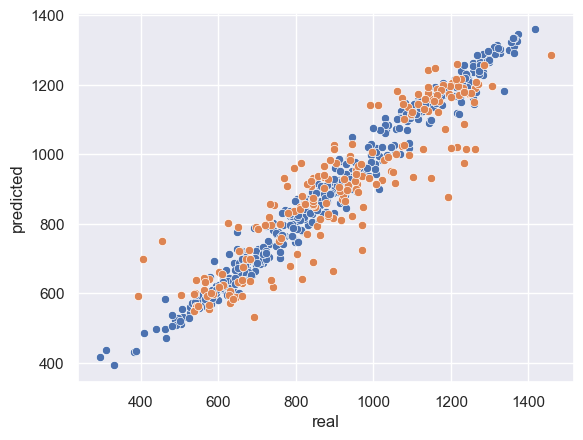

In [392]:
model_check(rfr)

In [393]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()

0.9772615188045993
27.914229074889864
36.78144693682563
0.8296435350074801
71.21887179487179
93.60919600343898


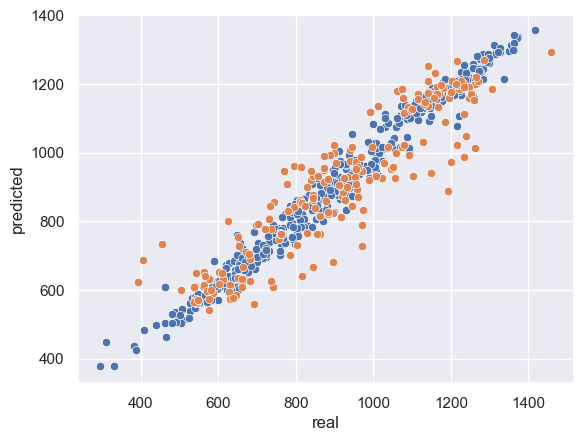

In [394]:
model_check(lr)

In [354]:
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)

print(r2_score(y_train, y_pred_train))

print(mean_absolute_error(y_train, y_pred_train))


print(np.sqrt(mean_squared_error(y_train, y_pred_train)))


0.9393490546569654
19.997995594713657
28.435699544591976


In [355]:
print(r2_score(y_test, y_pred_test))

print(mean_absolute_error(y_test, y_pred_test))

print(np.sqrt(mean_squared_error(y_test, y_pred_test)))

0.6874981457930525
45.13979487179487
61.15472679385273


In [362]:
result_train = pd.DataFrame({'real':y_train, 'predicted': y_pred_train})
result_train['diff'] = result_train['real'] - result_train['predicted']
result_train

,real,predicted,diff
976,495.0,512.57,-17.57
559,445.0,431.12,13.88
422,538.0,539.17,-1.17
545,499.0,507.48,-8.48
1078,379.0,412.56,-33.56
...,...,...,...
530,523.0,525.36,-2.36
1044,403.0,395.20,7.80
748,464.0,420.30,43.70
441,332.0,356.06,-24.06


<Axes: xlabel='real', ylabel='predicted'>

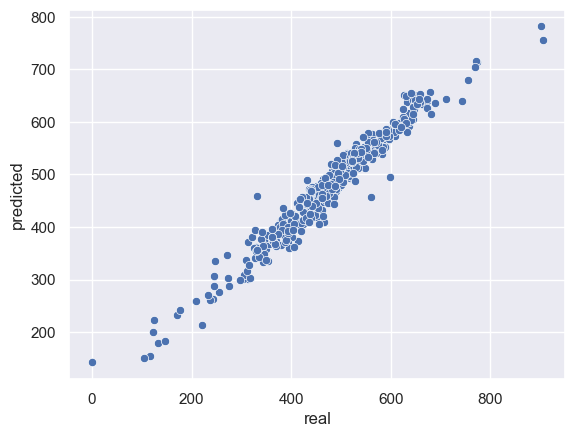

In [363]:
sns.scatterplot(data=result_train, x='real', y='predicted')

In [364]:
result_test = pd.DataFrame({'real':y_test, 'predicted': y_pred_test})
result_test['diff'] = result_test['real'] - result_test['predicted']
result_test

,real,predicted,diff
26,586.0,587.63,-1.63
880,612.0,546.17,65.83
576,475.0,502.88,-27.88
773,436.0,419.25,16.75
517,663.0,608.64,54.36
...,...,...,...
990,380.0,401.43,-21.43
371,337.0,343.00,-6.00
136,729.0,586.36,142.64
155,603.0,514.01,88.99


<Axes: xlabel='real', ylabel='predicted'>

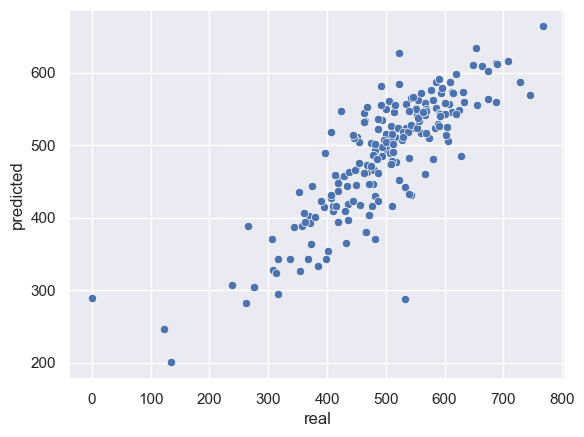

In [366]:
sns.scatterplot(data=result_test, x='real', y='predicted')

In [395]:
pd.Series(rfr.feature_importances_, x_train.columns).sort_values(ascending=False)

요일                0.448809
본사시간외근무명령서승인건수    0.261138
본사휴가자수            0.093646
본사출장자수            0.079552
석식main            0.024053
month             0.018811
본사정원수             0.016656
day               0.016507
조식main            0.014189
중식main            0.012403
year              0.011585
현본사소속재택근무자수       0.002653
dtype: float64

In [396]:
lr = LinearRegression()
lr.fit(x_train, y_train)
coefficients = pd.Series(lr.coef_, index=x_train.columns).sort_values(ascending=False)
print(coefficients)

요일                28.879768
조식main             0.568470
석식main             0.268098
본사시간외근무명령서승인건수     0.256314
본사정원수              0.088578
중식main             0.020900
현본사소속재택근무자수       -0.286480
day               -0.592626
본사휴가자수            -0.739125
month             -0.930162
본사출장자수            -2.589537
year             -23.279694
dtype: float64


In [397]:
import shap

In [ ]:
import shap
import matplotlib.pyplot as plt

# 1. SHAP Explainer 생성
explainer = shap.Explainer(model, x_train)  # 모델과 특징 데이터를 이용해 SHAP Explainer 생성

# 2. SHAP 값 계산
shap_values = explainer.shap_values(x_test)  # 테스트 데이터에 대한 SHAP 값 계산

# 3. SHAP 값을 사용한 시각화 또는 분석
# 요약 플롯 생성
shap.summary_plot(shap_values, x_test)
plt.show()

# 바 차트 생성
shap.summary_plot(shap_values, x_test, plot_type='bar')
plt.show()

In [430]:
x_test.columns

Index(['요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수',
       'year', 'month', 'day', '조식main', '중식main', '석식main'],
      dtype='object')

In [431]:
# import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'NanumGothic'  # 나눔고딕 폰트를 사용하도록 설정
plt.rcParams['font.family'] = 'AppleGothic'


In [438]:
top20

요일                0.448809
본사시간외근무명령서승인건수    0.261138
본사휴가자수            0.093646
본사출장자수            0.079552
석식main            0.024053
month             0.018811
본사정원수             0.016656
day               0.016507
조식main            0.014189
중식main            0.012403
year              0.011585
현본사소속재택근무자수       0.002653
dtype: float64

<Axes: >

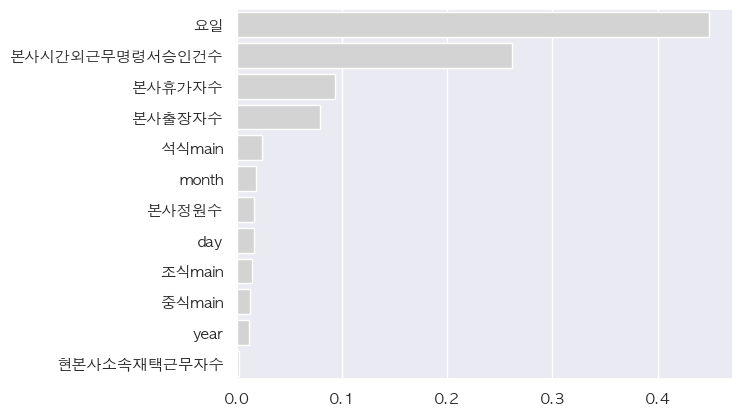

In [441]:
top20 = pd.Series(rfr.feature_importances_, x_train.columns).sort_values(ascending=False)
sns.barplot(y=top20.index, x=top20, color='lightgrey')

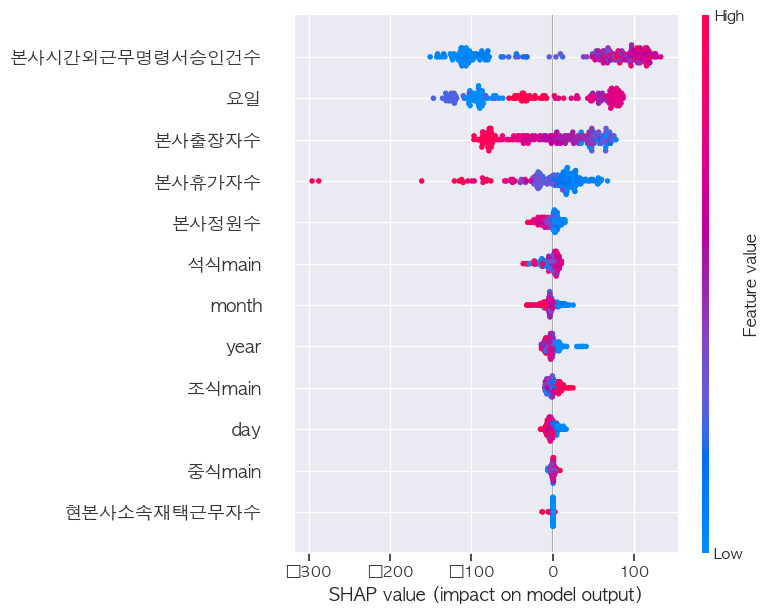

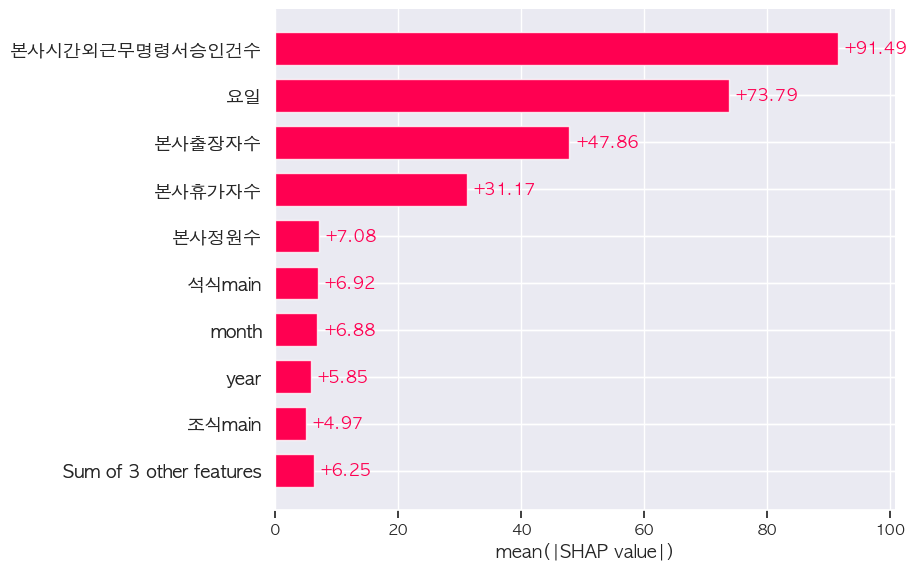

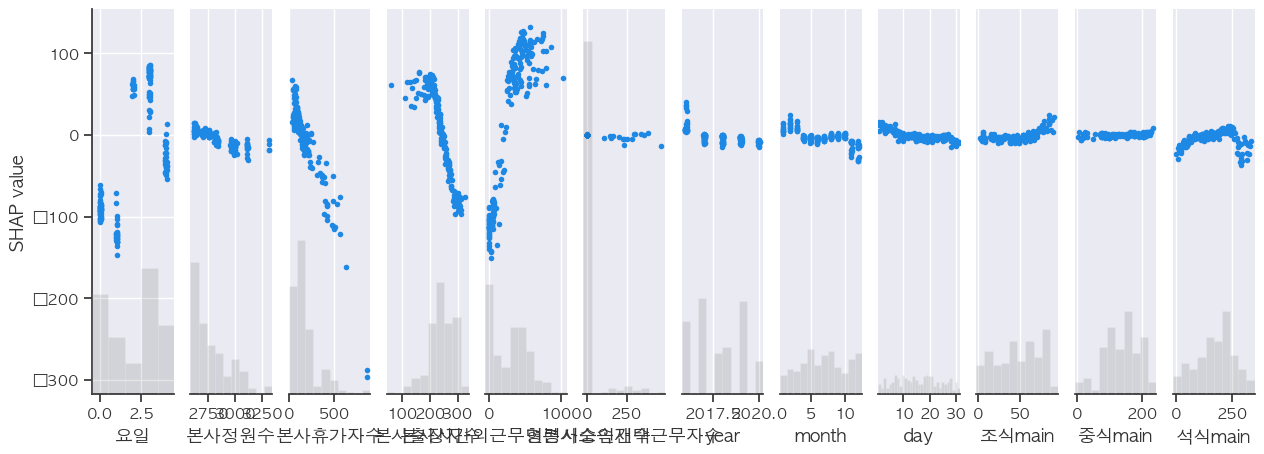

<Figure size 3000x1000 with 0 Axes>

In [424]:
import shap
import matplotlib.pyplot as plt

explainer = shap.Explainer(rfr, x_train)
shap_values = explainer(x_test)


shap.summary_plot(shap_summary_values, x_test)
plt.show()

shap.plots.bar(shap_values)
plt.show()


shap.plots.scatter(shap_values)
plt.gcf().set_size_inches(30,10)
plt.show()

